# Temperature Spatial Averages

In [1]:
import intake

import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr
import numpy as np

import cmocean as cm
import cartopy.crs as ccrs

import cartopy.feature as cft
import matplotlib.path as mpath

In [2]:
#Importing data
pancontrol01 = intake.open_esm_datastore('/home/272/kc5856/panantrial/experiment_datastore.json', columns_with_iterables=['variable'])
pantrial01 = intake.open_esm_datastore('/home/272/kc5856/catalog_dir/experiment_datastore.json', columns_with_iterables=['variable'])
pancontrol005 = intake.open_esm_datastore('/home/272/kc5856/catalog_dir/panant_005_zstar_access_yr2.json', columns_with_iterables=['variable'])
pantrial005 = intake.open_esm_datastore('/home/272/kc5856/panantrial/panant_005_zstar_MWonly.json', columns_with_iterables=['variable'])

In [3]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43685 instead
  warnings.warn(
2025-03-13 23:43:41,785 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37547' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('getitem-1b11b485e83dbb87f8266efcd3730871', 104, 0, 12, 53), ('invert-9ba9b7d994a5c0fc56d0dbc868050249', 105, 0, 15, 1), ('invert-9ba9b7d994a5c0fc56d0dbc868050249', 106, 0, 7, 43), ('getitem-1b11b485e83dbb87f8266efcd3730871', 105, 0, 3, 68), ('getitem-79af84d3773b4eb7c8ade92312cb32e6', 185, 0, 2, 63), ('invert-9ba9b7d994a5c0fc56d0dbc868050249', 104, 0, 4, 52), ('invert-9ba9b7d994a5c0fc56d0dbc868050249', 104, 0, 3, 56), ('invert-9ba9b7d994a5c0fc56d0dbc868050249', 105, 0, 17, 47), ('invert-508ea1de92df2cb7982aad2fe5e282e9', 185, 0, 17, 22), ('get

In [4]:
#Time variant variables #ASK HOW TO CONDENSE
control01_temp = pancontrol01.search(variable="thetao", frequency="1mon").to_dask()
trial01_temp = pantrial01.search(variable="thetao", frequency="1mon").to_dask()
control005_temp = pancontrol005.search(variable=["thetao"],frequency="1mon",file_id=["XXXXXXXX_ocean_month_z"]).to_dask()
trial005_temp = pantrial005.search(variable="thetao", frequency="1mon").to_dask()

In [6]:
#Area weighting
data01_fixed = pancontrol01.search(variable=["areacello","deptho"],path=".*output021.*").to_dask()
data005_fixed = pancontrol005.search(variable=["areacello","depth"],path=".*output021.*").to_dask()
vol01 = pancontrol01.search(variable=["volcello"],path=".*output021.*",file_id=["XXXXXXXX_ocean_month_z"]).to_dask()
vol005 = pancontrol005.search(variable=["volcello"],path=".*output021.*",file_id=["XXXXXXXX_ocean_month_z"]).to_dask()

In [7]:
areacello01 = data01_fixed.areacello
areacello005 = data005_fixed.areacello
thick01 = vol01 / areacello01
thick005 = vol005 / areacello005

In [18]:
tempcont_200_01 = control01_temp.thetao.sel(z_l=slice(0,207)).weighted(thick01['z_l'].fillna(0)).mean(dim='z_l').weighted(areacello01.fillna(0)).mean(dim=('xh','yh'))
temppert_200_01 = trial01_temp.thetao.sel(z_l=slice(0,207)).weighted(thick01['z_l'].fillna(0)).mean(dim='z_l').weighted(areacello01.fillna(0)).mean(dim=('xh','yh'))
#need to add grid thickness weighting

In [22]:
tempcont_200_01 = tempcont_200_01.load()
temppert_200_01 = temppert_200_01.load()

Text(0.5, 1.0, 'Panan01 Time Series of Temperature for top 200m')

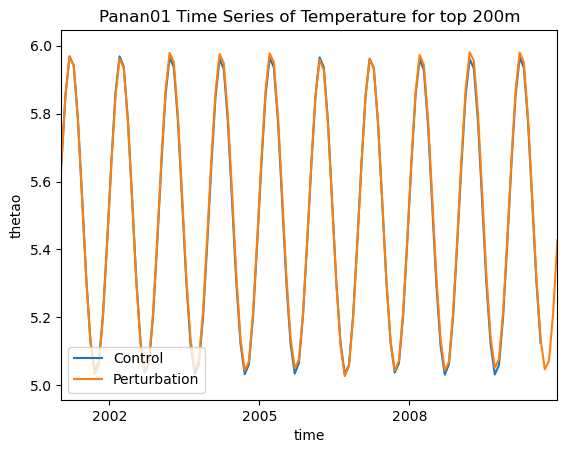

In [40]:
tempcont_200_01.plot(label="Control")
temppert_200_01.plot(label="Perturbation")
plt.xlim(380,4000)
plt.legend(loc="lower left")
plt.title("Panan01 Time Series of Temperature for top 200m")

In [41]:
tempanom_01 = temppert_200_01 - tempcont_200_01

/jobfs/136764484.gadi-pbs/ipykernel_1069117/3702356288.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


Text(0.5, 1.0, 'Panan01 Time Series of Temperature for top 200m Anomaly')

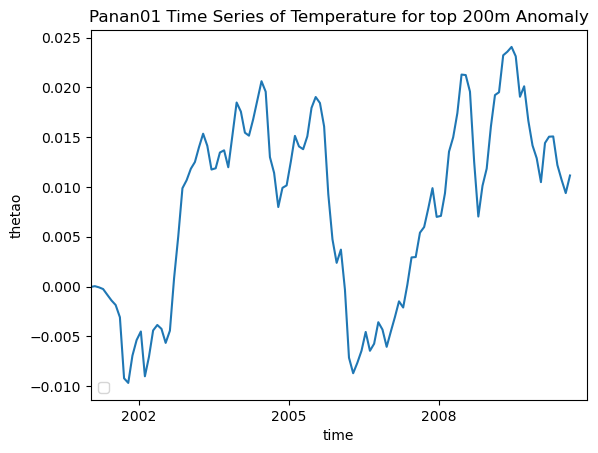

In [42]:
tempanom_01.plot()
plt.xlim(380,4000)
plt.legend(loc="lower left")
plt.title("Panan01 Time Series of Temperature for top 200m Anomaly")

In [43]:
tempcont_200_005 = control005_temp.thetao.sel(z_l=slice(0,207)).weighted(thick005['z_l'].fillna(0)).mean(dim='z_l').weighted(areacello005.fillna(0)).mean(dim=('xh','yh'))
temppert_200_005 = trial005_temp.thetao.sel(z_l=slice(0,207)).weighted(thick005['z_l'].fillna(0)).mean(dim='z_l').weighted(areacello005.fillna(0)).mean(dim=('xh','yh'))
#need to add grid thickness weighting

In [44]:
tempcont_200_005 = tempcont_200_005.load()
temppert_200_005 = temppert_200_005.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 226.02 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 113.03 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Text(0.5, 1.0, 'Panan005 Time Series of Temperature for top 200m')

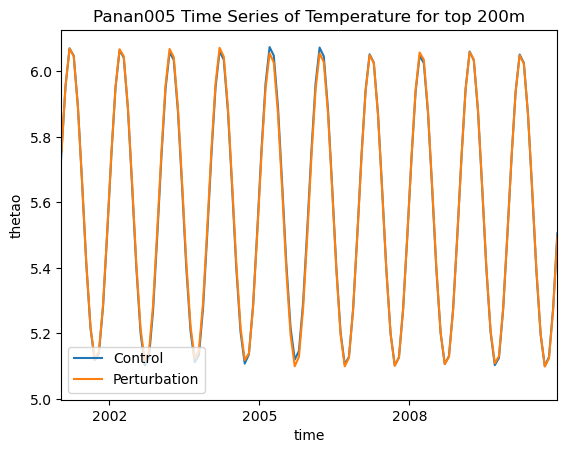

In [54]:
tempcont_200_005.plot(label="Control")
temppert_200_005.plot(label="Perturbation")
plt.xlim(380,4000)
plt.legend(loc="lower left")
plt.title("Panan005 Time Series of Temperature for top 200m")

In [55]:
tempanom_005 = temppert_200_005 - tempcont_200_005

/jobfs/136764484.gadi-pbs/ipykernel_1069117/1568759234.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


Text(0.5, 1.0, 'Panan005 Time Series of Temperature for top 200m Anomaly')

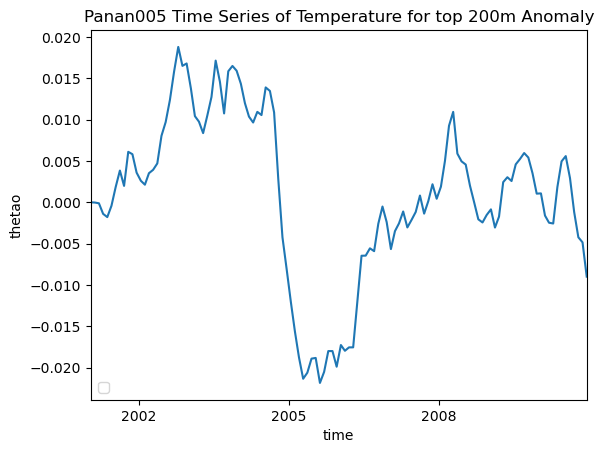

In [56]:
tempanom_005.plot()
plt.xlim(380,4000)
plt.legend(loc="lower left")
plt.title("Panan005 Time Series of Temperature for top 200m Anomaly")

# Top 500 m maps

In [17]:
tempcont_500_01 = control01_temp.thetao.sel(z_l=slice('0','500')).weighted(thick01['z_l'].fillna(0)).mean(dim='z_l').sel(time=slice('2006-01','2010-01')).mean(dim='time')
temppert_500_01 = trial01_temp.thetao.sel(z_l=slice('0','500')).weighted(thick01['z_l'].fillna(0)).mean(dim='z_l').sel(time=slice('2006-01','2010-01')).mean(dim='time')
tempanom_500_01 = temppert_500_01 - tempcont_500_01

In [8]:
tempcont_500_005 = control005_temp.thetao.sel(z_l=slice(0,207)).weighted(thick005['z_l'].fillna(0)).mean(dim='z_l').sel(time=slice('2006-01','2010-01')).mean(dim='time')
temppert_500_005 = trial005_temp.thetao.sel(z_l=slice(0,207)).weighted(thick005['z_l'].fillna(0)).mean(dim='z_l').sel(time=slice('2006-01','2010-01')).mean(dim='time')
tempanom_500_005 = temppert_500_005 - tempcont_500_005

In [9]:
land_50m = cft.NaturalEarthFeature("physical", "land", "50m", edgecolor="black", facecolor="papayawhip", linewidth=0.5)
projection = ccrs.SouthPolarStereo()

In [10]:
def shelf_mask_isobath(var, model_dict):

    paths = {
             "mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6_01": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc",
            "mom6_005": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc"
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [11]:
depth = data01_fixed.deptho#.to_array().squeeze()
land_mask = (depth*0).fillna(1)
depth_shelf, shelf_mask = shelf_mask_isobath(depth, 'mom6_01')

In [19]:
tempanom_500_01 = tempanom_500_01.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 13.84 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


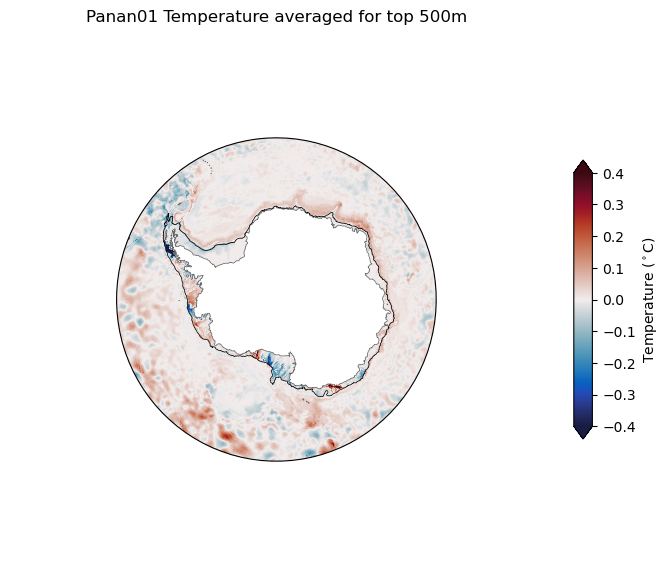

In [21]:
plt.figure(figsize=(8, 7))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -35], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary for the map. 
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.3
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

ax.contour(land_mask.cf['X'], land_mask.cf['Y'], land_mask,
           levels = [0, 1], colors = 'dimgrey',linewidths=0.5, transform = ccrs.PlateCarree())
ax.contour(shelf_mask.cf['X'], shelf_mask.cf['Y'], shelf_mask,
           levels = [0, 1], colors = 'black', linewidths=0.5,transform = ccrs.PlateCarree())

tempanom_500_01.plot(
    x="xh",
    y="yh",
    transform=ccrs.PlateCarree(),
    vmin=-0.4,
    vmax=0.4,
    extend="both",
    cmap=cm.cm.balance, #cm ocean colour maps for more options, matplotlib has more also.
    cbar_kwargs={"label": "Temperature ($^\circ$C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7},
);

plt.title("Panan01 Temperature averaged for top 500m");

In [ ]:
tempanom_500_005 = tempanom_500_005.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 83.33 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2025-03-13 23:43:40,637 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:35659 -> tcp://127.0.0.1:37547
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
ConnectionResetError: [Errno 104] Connection reset by peer

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public

In [ ]:
plt.figure(figsize=(8, 7))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -35], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary for the map. 
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.3
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

ax.contour(land_mask.cf['X'], land_mask.cf['Y'], land_mask,
           levels = [0, 1], colors = 'dimgrey',linewidths=0.5, transform = ccrs.PlateCarree())
ax.contour(shelf_mask.cf['X'], shelf_mask.cf['Y'], shelf_mask,
           levels = [0, 1], colors = 'black', linewidths=0.5,transform = ccrs.PlateCarree())

tempanom_500_005.plot(
    x="xh",
    y="yh",
    transform=ccrs.PlateCarree(),
    vmin=-0.4,
    vmax=0.4,
    extend="both",
    cmap=cm.cm.balance, #cm ocean colour maps for more options, matplotlib has more also.
    cbar_kwargs={"label": "Temperature ($^\circ$C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7},
);

plt.title("Panan005 Temperature averaged for top 500m");